<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/Basic_Stock_visualisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

In [3]:
!pip install pandas_datareader

In [10]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import pandas_datareader.data as web
import yfinance as yf

In [5]:
START_DATE="2005-01-01"
END_DATE=str(datetime.now().strftime("%Y-%m-%d"))

[*********************100%%**********************]  1 of 1 completed
<ipython-input-14-31d7b3538764>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return clean_data.fillna(method='ffill')


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2005-01-03   628.815002   628.815002   628.815002   628.815002   229.454361   
2005-01-04   626.320007   636.301025   626.320007   633.307007   231.093384   
2005-01-05   632.807983   634.804016   603.862000   631.309998   230.364685   
2005-01-06   633.806030   638.796021   630.810974   637.299011   232.550110   
2005-01-07   638.296997   642.289978   633.806030   636.301025   232.185974   
...                 ...          ...          ...          ...          ...   
2024-07-29  1018.500000  1031.000000  1015.500000  1023.500000  1023.500000   
2024-07-30  1020.500000  1024.500000  1013.500000  1024.000000  1024.000000   
2024-07-31  1024.500000  1038.000000  1024.500000  1033.000000  1033.000000   
2024-08-01  1033.000000  1045.500000  1025.500000  1033.000000  1033.000000   
2024-08-02  1027.500000  1066.500000  1025.000000  1

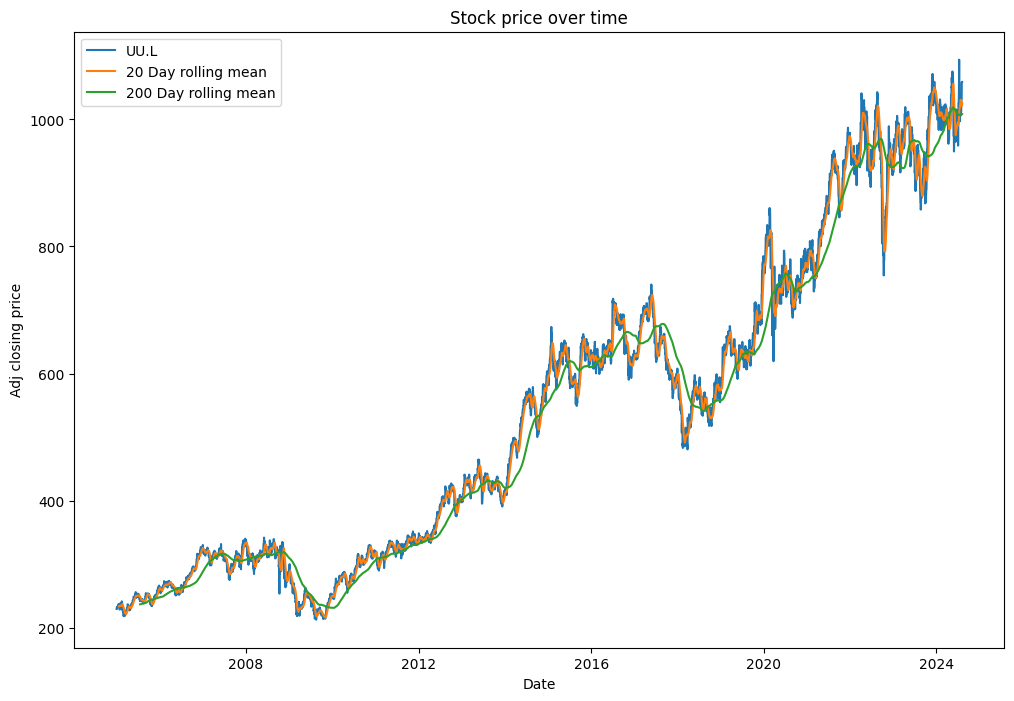

In [14]:
UK_stock='UU.L'
US_stock='AMZN'

def clean_data(stock_data,col):
  weekdays=pd.date_range(start=START_DATE,end=END_DATE)
  clean_data=stock_data[col].reindex(weekdays)
  return clean_data.fillna(method='ffill')
def get_stats(stock_data):
  return{
      'last':np.mean(stock_data.tail(1)),
      'short_mean': np.mean(stock_data.tail(20)),
      'long_mean': np.mean(stock_data.tail(200)),
      'short_rolling': stock_data.rolling(window=20).mean(),
      'long_rolling': stock_data.rolling(window=200).mean(),
  }

def create_plot(stock_data,ticker):
  stats= get_stats(stock_data)
  plt.subplots(figsize=(12,8))
  plt.plot(stock_data,label=ticker)
  plt.plot(stats['short_rolling'],label="20 Day rolling mean")
  plt.plot(stats['long_rolling'],label="200 Day rolling mean")
  plt.xlabel("Date")
  plt.ylabel("Adj closing price")
  plt.legend()
  plt.title("Stock price over time")
  plt.show()

def get_data(ticker):
  try:
    # Use yfinance to fetch data
    stock_data = yf.download(ticker, start=START_DATE, end=END_DATE)
    print(stock_data)

    adj_close= clean_data(stock_data,'Adj Close')
    create_plot(adj_close,ticker)

  except Exception as e: # Catch general exceptions
    print("No data found for {t}: {e}".format(t=ticker, e=e))

get_data(UK_stock)